<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-23-Community-Detection-and-Mining-in-Social-Networks/blob/main/Chapter_23_Community_Detection_and_Mining_in_Social_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice Example: Navigating Complex Networks: Community Detection in Literature, E-commerce, and Credit Card Transactions**

**Example-1:**

Let's create a simple example using the Les Misérables Character Network. you will use a small dataset representing co-appearances of characters in the novel and apply community detection to reveal the subplots and relationships between them. For this example, we will use the NetworkX library in Python to create the network and the Louvain method for community detection.


In [1]:
!pip install networkx matplotlib

<ipython-input-2-09ae66a2047f>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


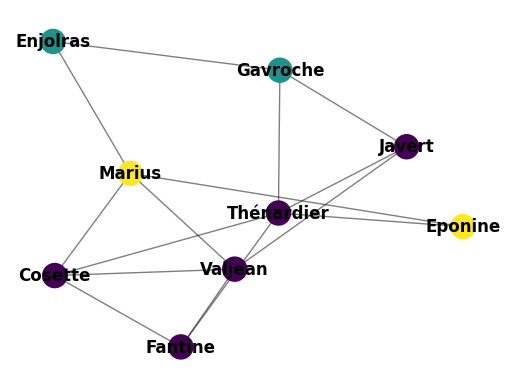

In [2]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt


# Create a graph with character co-appearances
edges = [('Valjean', 'Fantine'), ('Valjean', 'Cosette'), ('Valjean', 'Marius'), ('Valjean', 'Javert'),
         ('Fantine', 'Cosette'), ('Fantine', 'Thénardier'), ('Cosette', 'Marius'), ('Cosette', 'Thénardier'),
         ('Marius', 'Eponine'), ('Marius', 'Enjolras'), ('Eponine', 'Thénardier'), ('Enjolras', 'Gavroche'),
         ('Thénardier', 'Javert'), ('Thénardier', 'Gavroche'), ('Javert', 'Gavroche')]
G = nx.Graph()
G.add_edges_from(edges)
# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)
# Visualize the network with different colors for each community
pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=300, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=dict(zip(partition.keys(), partition.keys())), font_size=12, font_weight='bold')
plt.axis('off')
plt.show()





**Example -2:**

Let's create an example using a simplified Amazon Book Recommendation Network. In this example, we will create a small network of books that are bought together by customers. We will then apply community detection to identify clusters of books that are frequently purchased together.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Create a sample book recommendation network
G = nx.Graph()



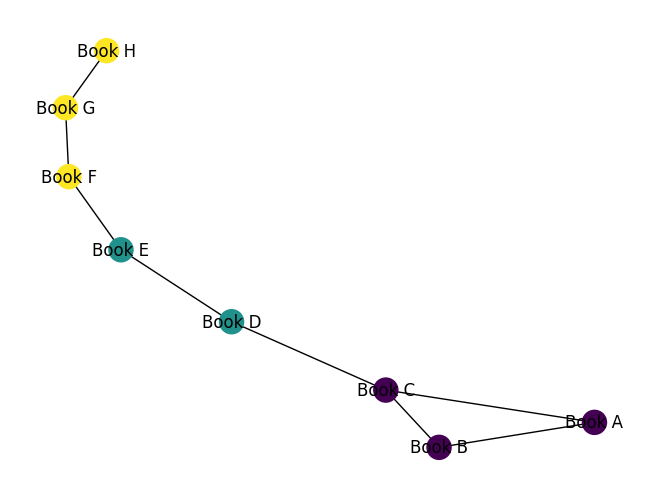

In [4]:
# Add nodes for books (use book titles as node labels)
books = ['Book A', 'Book B', 'Book C', 'Book D', 'Book E', 'Book F', 'Book G', 'Book H']

for book in books:
    G.add_node(book)

# Add edges to represent books that are bought together
edges = [
    ('Book A', 'Book B'),
    ('Book A', 'Book C'),
    ('Book B', 'Book C'),
    ('Book C', 'Book D'),
    ('Book D', 'Book E'),
    ('Book E', 'Book F'),
    ('Book F', 'Book G'),
    ('Book G', 'Book H'),
]

G.add_edges_from(edges)
# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Visualize the network with different colors for each community
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()




**Example -3:**

In this example, we'll create a simplified credit card transaction network between cardholders and stores. We will then apply community detection to identify potential communities of fraudsters and vulnerable stores.


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# Create a sample credit card transaction network
G = nx.Graph()



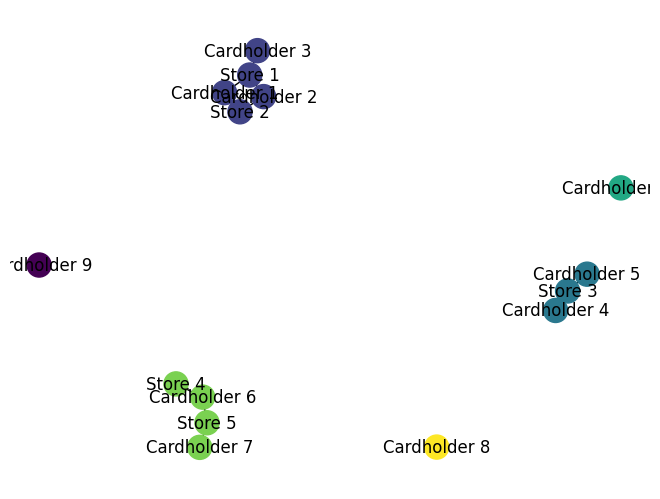

In [6]:
# Add nodes for cardholders (use unique IDs as node labels)
cardholders = [f'Cardholder {i}' for i in range(1, 11)]

for cardholder in cardholders:
    G.add_node(cardholder)

# Add nodes for stores (use unique IDs as node labels)
stores = [f'Store {i}' for i in range(1, 6)]

for store in stores:
    G.add_node(store)

# Add edges to represent transactions between cardholders and stores
transactions = [
    ('Cardholder 1', 'Store 1'),
    ('Cardholder 1', 'Store 2'),
    ('Cardholder 2', 'Store 1'),
    ('Cardholder 2', 'Store 2'),
    ('Cardholder 3', 'Store 1'),
    ('Cardholder 4', 'Store 3'),
    ('Cardholder 5', 'Store 3'),
    ('Cardholder 6', 'Store 4'),
    ('Cardholder 6', 'Store 5'),
    ('Cardholder 7', 'Store 5'),
]
G.add_edges_from(transactions)

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G)

# Visualize the network with different colors for each community
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()


# **Practice Opportunity: Using the Kernighan-Lin Algorithm to Detect Fraud in Retail Transactions**

1.	Install NetworkX if you haven't already:

In [7]:
!pip install networkx

create a synthetic example for credit card fraud detection using the Kernighan-Lin algorithm in Python. In this example, we'll consider nodes as stores, and edges represent the frequency of transactions between stores using the same credit card. The goal is to partition the stores into two communities: one with a higher probability of fraud and the other with a lower probability of fraud.

2.	Rate a synthetic graph representing store transactions:

In [8]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add edges between stores with varying weights (transaction frequency)
edges = [
    ("Store_A", "Store_B", 10),
    ("Store_A", "Store_C", 8),
    ("Store_B", "Store_C", 12),
    ("Store_C", "Store_D", 7),
    ("Store_D", "Store_E", 14),
    ("Store_E", "Store_A", 5),
    ("Store_A", "Store_F", 20),
    ("Store_B", "Store_G", 3),
    ("Store_C", "Store_H", 25),
    ("Store_D", "Store_I", 15),
    ("Store_E", "Store_J", 4),
    ("Store_F", "Store_G", 18),
    ("Store_F", "Store_H", 30),
    ("Store_G", "Store_I", 2),
    ("Store_H", "Store_I", 22),
    ("Store_H", "Store_J", 17),
    ("Store_I", "Store_J", 1),
]

G.add_weighted_edges_from(edges)


3.	Create an initial partition of the nodes:

In [9]:
nodes = list(G.nodes)
random.shuffle(nodes)
initial_partition = (nodes[:len(nodes)//2], nodes[len(nodes)//2:])

4. Modify the cut_size function to account for edge weights:

In [10]:
def cut_size(G, set1, set2):
    return sum(G[u][v]["weight"] for u in set1 for v in set2 if v in G[u])


5.	Run the Kernighan-Lin algorithm (use the same implementation as before):

In [11]:
def kernighan_lin(G, initial_partition):
    # This is a placeholder for the actual Kernighan-Lin algorithm.
    # It returns the initial partition for demonstration purposes.
    return initial_partition


6.	Visualize the result:

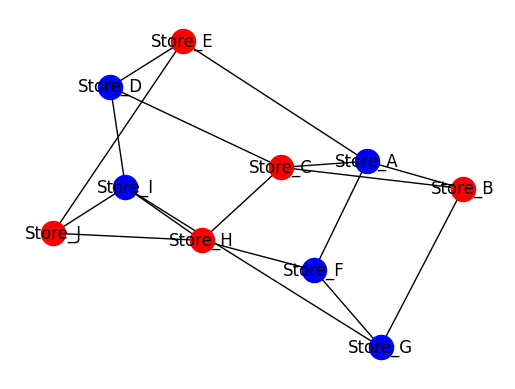

In [12]:
def visualize_partition(G, partition):
    pos = nx.spring_layout(G, seed=42)  # for consistent layout
    colors = ['red', 'blue']

    for i, community in enumerate(partition):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i])
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.axis('off')
    plt.show()

result = kernighan_lin(G, initial_partition)
visualize_partition(G, result)


# **Practice Opportunity: Insurance Fraud Detection Using Social Network Analysis**

1. Import the necessary libraries:

In [28]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman


2. Create a dataset containing information on claims, such as policyholder IDs, claim IDs, claim amounts, shared addresses, shared phones, family relationships, and fraud labels:

In [36]:
# Sample data creation
data = {
    'policyholder_id': np.arange(1, 101),
    'claim_id': np.random.randint(1, 500, 100),
    'claim_amount': np.random.randint(1000, 50000, 100),
    'shared_address': np.random.randint(0, 2, 100),
    'shared_phone': np.random.randint(0, 2, 100),
    'is_family': np.random.randint(0, 2, 100),
    'is_fraud': np.random.choice([0, 1], 100, p=[0.9, 0.1])
}

df = pd.DataFrame(data)

3. Create a graph from the DataFrame. Add nodes representing policyholders, and set the is_fraud attribute for each node. Add edges between nodes based on the shared address, shared phone, and family relationships. Set the edge weight to the claim amount:

In [37]:
G = nx.Graph()

# Add nodes
for policyholder_id in df['policyholder_id']:
    G.add_node(policyholder_id, is_fraud=df[df['policyholder_id'] == policyholder_id]['is_fraud'].iloc[0])

# Add edges
for _, row in df.iterrows():
    if row['shared_address'] or row['shared_phone'] or row['is_family']:
        # Example simplification: connecting policyholders randomly since the exact connections aren't specified
        target = df.sample(n=1)['policyholder_id'].iloc[0]
        G.add_edge(row['policyholder_id'], target)


4. Apply the Girvan-Newman algorithm to identify communities within the graph. The community’s variable contains a list of communities, each represented as a list of nodes:

In [38]:
# Apply the Girvan-Newman algorithm
communities = list(girvan_newman(G))
# Taking the first level of communities detected
first_level_communities = sorted(map(sorted, communities[0]))


In [44]:
for i, community in enumerate(first_level_communities):
    fraud_counts = sum([G.nodes[node]['is_fraud'] for node in community])
    print(f"Community {i+1}: {len(community)} members, {fraud_counts} potential frauds")


Community 1: 16 members, 3 potential frauds
Community 2: 16 members, 2 potential frauds
Community 3: 12 members, 1 potential frauds
Community 4: 13 members, 1 potential frauds
Community 5: 11 members, 1 potential frauds
Community 6: 8 members, 2 potential frauds
Community 7: 1 members, 0 potential frauds
Community 8: 5 members, 4 potential frauds
Community 9: 5 members, 1 potential frauds
Community 10: 2 members, 0 potential frauds
Community 11: 3 members, 0 potential frauds
Community 12: 1 members, 0 potential frauds
Community 13: 2 members, 0 potential frauds
Community 14: 2 members, 1 potential frauds
Community 15: 1 members, 0 potential frauds
Community 16: 1 members, 0 potential frauds
Community 17: 1 members, 0 potential frauds


5.	Define the colors for the communities

In [40]:
# Assign colors to communities
community_colors = {node: i for i, community in enumerate(first_level_communities) for node in community}
colors = [community_colors[node] for node in G.nodes()]


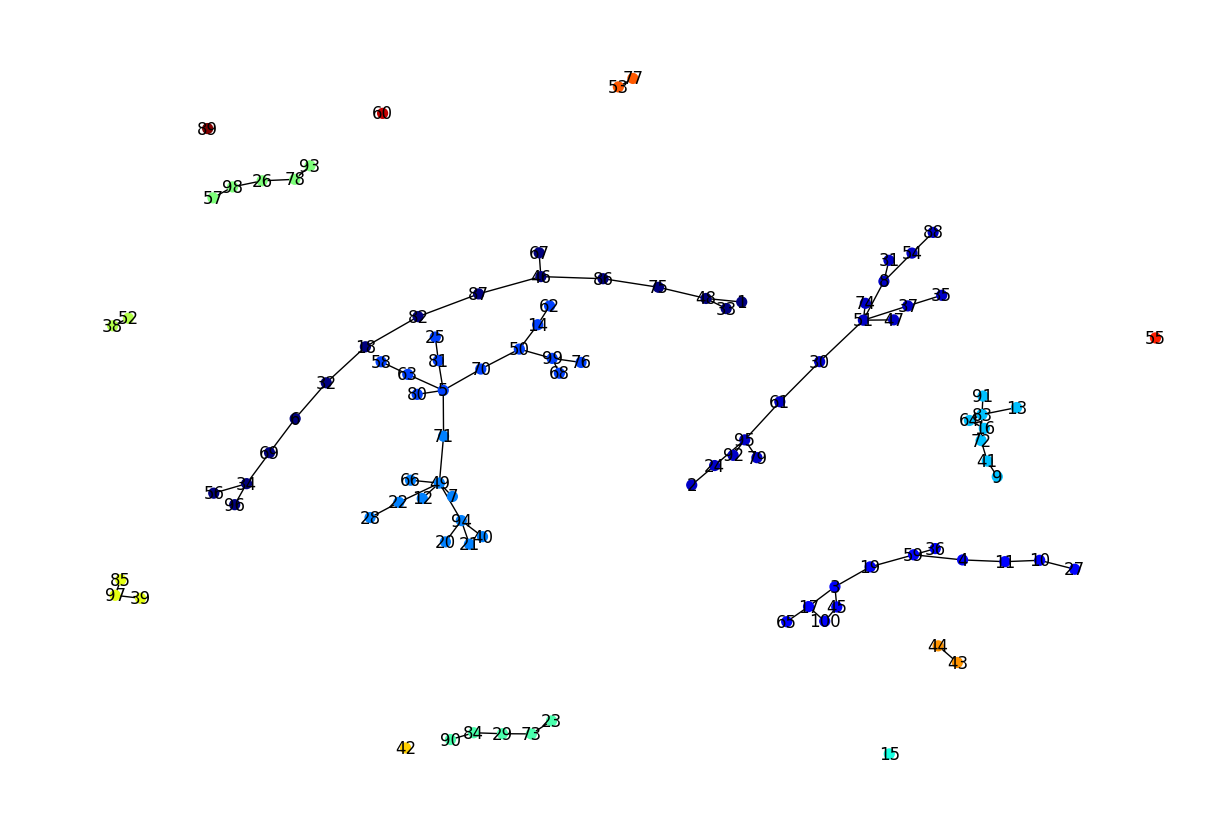

In [45]:
plt.figure(figsize=(12, 8))
nx.draw(G, node_color=colors, with_labels=True, node_size=50, cmap=plt.cm.jet)
plt.show()


<Figure size 1500x2000 with 0 Axes>

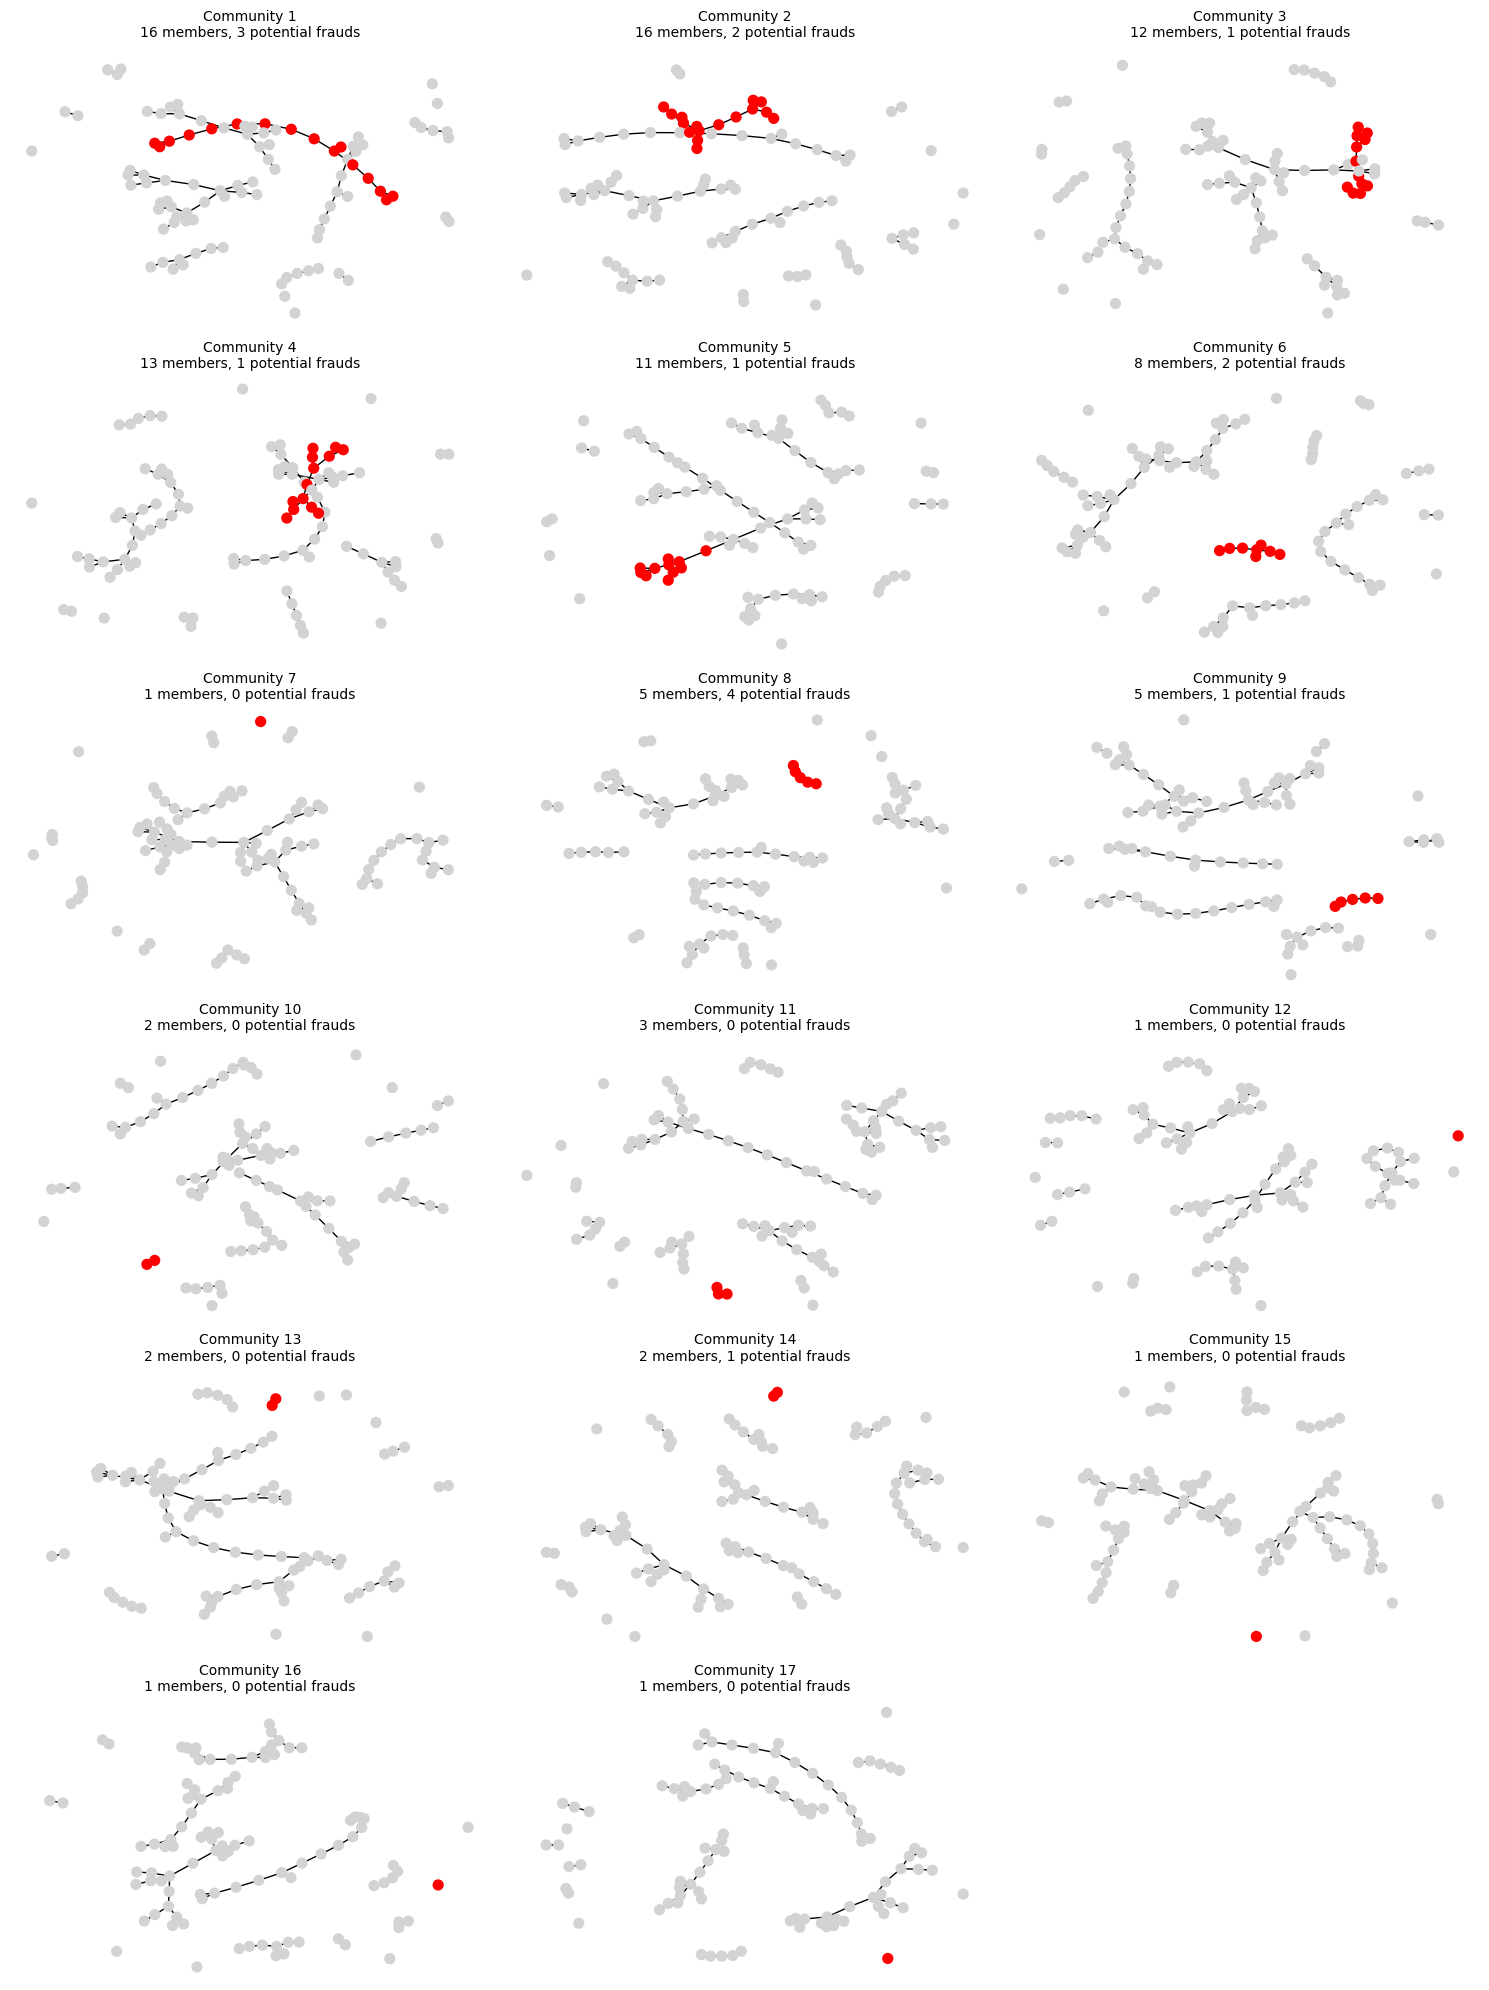

In [43]:
# To highlight each community and show the fraud cases, we'll draw the graph multiple times, each time highlighting a different community.

# Set figure size for the plots
plt.figure(figsize=(15, 20))

# Number of communities to draw
num_communities = len(first_level_communities)

# Create subplots
fig, axes = plt.subplots((num_communities + 2) // 3, 3, figsize=(15, 20))

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, community in enumerate(first_level_communities):
    # Generate colors for each node, highlighting the current community
    highlight_colors = ['red' if node in community else 'lightgray' for node in G.nodes()]

    # Draw the graph with highlighted community
    nx.draw(G, node_color=highlight_colors, with_labels=False, node_size=50, ax=axes[i])

    # Highlight fraud cases in the current community
    fraud_cases = [node for node in community if G.nodes[node]['is_fraud'] == 1]

    # Title with community info
    axes[i].set_title(f'Community {i+1}\n{len(community)} members, {len(fraud_cases)} potential frauds', fontsize=10)

# Hide any unused axes if the number of communities is not a multiple of 3
for ax in axes[len(first_level_communities):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# **Modularity Optimization Methods: Now let us use Louvain Method to identify communities**

Modularity Community 1: 14 members, 0 potential frauds
Modularity Community 2: 13 members, 2 potential frauds
Modularity Community 3: 11 members, 1 potential frauds
Modularity Community 4: 10 members, 0 potential frauds
Modularity Community 5: 10 members, 1 potential frauds
Modularity Community 6: 7 members, 0 potential frauds
Modularity Community 7: 6 members, 0 potential frauds
Modularity Community 8: 5 members, 2 potential frauds
Modularity Community 9: 5 members, 0 potential frauds
Modularity Community 10: 3 members, 0 potential frauds
Modularity Community 11: 3 members, 1 potential frauds
Modularity Community 12: 3 members, 0 potential frauds
Modularity Community 13: 2 members, 0 potential frauds
Modularity Community 14: 2 members, 0 potential frauds
Modularity Community 15: 1 members, 0 potential frauds
Modularity Community 16: 1 members, 0 potential frauds
Modularity Community 17: 1 members, 0 potential frauds
Modularity Community 18: 1 members, 0 potential frauds
Modularity Com

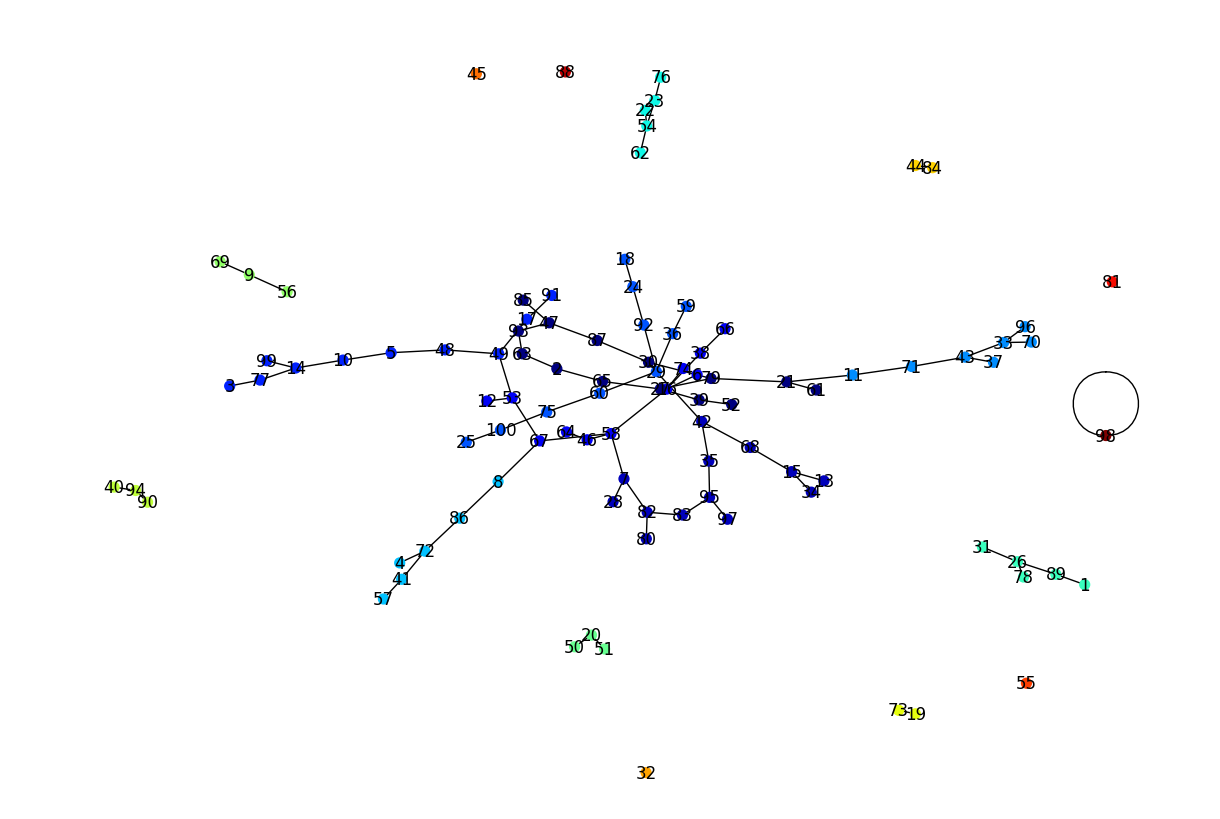

In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Sample data creation
data = {
    'policyholder_id': np.arange(1, 101),
    'claim_id': np.random.randint(1, 500, 100),
    'claim_amount': np.random.randint(1000, 50000, 100),
    'shared_address': np.random.randint(0, 2, 100),
    'shared_phone': np.random.randint(0, 2, 100),
    'is_family': np.random.randint(0, 2, 100),
    'is_fraud': np.random.choice([0, 1], 100, p=[0.9, 0.1])
}

df = pd.DataFrame(data)

G = nx.Graph()

# Add nodes
for policyholder_id in df['policyholder_id']:
    G.add_node(policyholder_id, is_fraud=df[df['policyholder_id'] == policyholder_id]['is_fraud'].iloc[0])

# Add edges
for _, row in df.iterrows():
    if row['shared_address'] or row['shared_phone'] or row['is_family']:
        # Example simplification: connecting policyholders randomly since the exact connections aren't specified
        target = df.sample(n=1)['policyholder_id'].iloc[0]
        G.add_edge(row['policyholder_id'], target)

# Use greedy modularity communities for community detection
communities = greedy_modularity_communities(G)

# Print the communities and count potential frauds in each community
for i, community in enumerate(communities):
    fraud_counts = sum(G.nodes[node]['is_fraud'] for node in community)
    print(f"Modularity Community {i+1}: {len(community)} members, {fraud_counts} potential frauds")

# Assign colors to communities for visualization
community_colors = {node: i for i, community in enumerate(communities) for node in community}
colors = [community_colors[node] for node in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw(G, node_color=colors, with_labels=True, node_size=50, cmap=plt.cm.jet)
plt.show()


# **Overlapping Community Detection Methods: Use the Label Propagation Algorithm (LPA) to identify communities**

Community 1: [1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
Community 2: [7, 8]
Community 3: [12]
Potential fraud rings: [[1, 2, 3, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]]


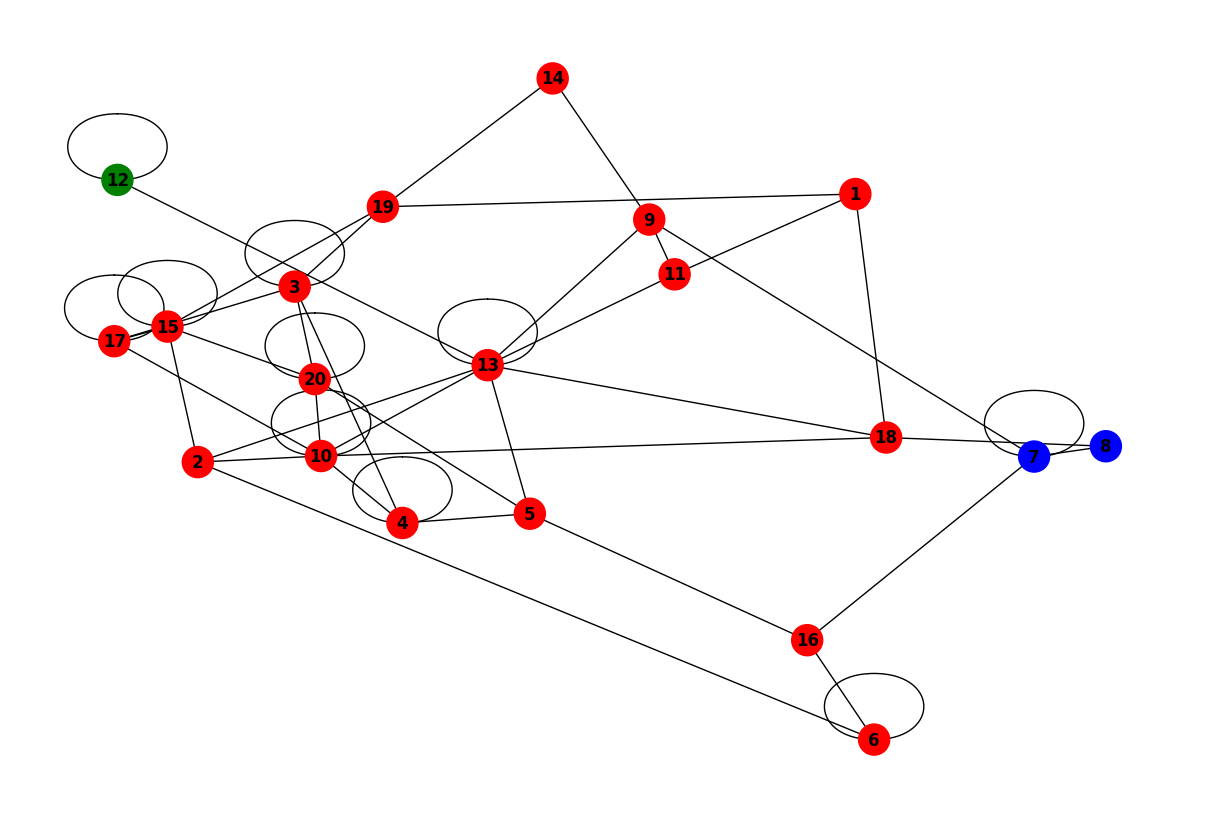

In [47]:
# Simulating the execution of the provided code with necessary adjustments

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities
from collections import defaultdict
import itertools

# Simulated data creation as the dataset 'insurance_claims.csv' is not directly accessible
data = {
    'policyholder_id': np.arange(1, 21),  # Simulating 20 policyholders
    'is_fraud': np.random.choice([0, 1], 20, p=[0.8, 0.2]),  # 20% chance of being fraud
    'shared_address': np.random.choice([np.nan, 'Address 1', 'Address 2'], 20),
    'shared_phone': np.random.choice([np.nan, 'Phone 1', 'Phone 2'], 20),
    'is_family': np.random.choice([0, 1], 20),
    'claim_amount': np.random.randint(1000, 50000, 20)
}

df = pd.DataFrame(data)

# Create the graph from the DataFrame
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row['policyholder_id'], is_fraud=row['is_fraud'])
    for col in ['shared_address', 'shared_phone', 'is_family']:
        if pd.notna(row[col]) and row[col]:
            target = np.random.choice(df[df[col] == row[col]]['policyholder_id'].values)
            G.add_edge(row['policyholder_id'], target, weight=row['claim_amount'])

# Apply the Label Propagation Algorithm to identify communities
communities = label_propagation_communities(G)
sorted_communities = [sorted(community) for community in communities]
for i, community in enumerate(sorted_communities, start=1):
    print(f"Community {i}: {community}")

# Analyze the resulting communities for potential fraud rings
potential_fraud_rings = []
for community in sorted_communities:
    fraud_count = sum(G.nodes[node]['is_fraud'] for node in community)
    if fraud_count > 1:
        potential_fraud_rings.append(community)
print("Potential fraud rings:", potential_fraud_rings)

# Define the colors for the communities
colors = itertools.cycle(['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta'])
community_to_color = defaultdict(lambda: next(colors))

# Map nodes to community colors for visualization
node_colors = [community_to_color[i] for node in G.nodes() for i, community in enumerate(sorted_communities) if node in community]

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, with_labels=True, font_weight='bold', node_size=500)
plt.show()


# **Merged Graph Partitioning Approaches**

# **Min-Cut Metric:**

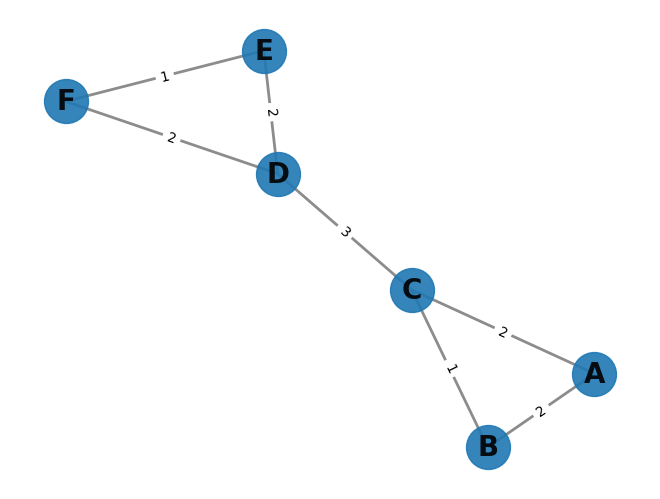

Min-Cut Value: 3
Min-Cut Partition: (['F'], ['E', 'B', 'A', 'C', 'D'])


In [48]:
import networkx as nx
import matplotlib.pyplot as plt
# Create the graph
G = nx.Graph()
# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
# Add weighted edges
G.add_weighted_edges_from([('A', 'B', 2), ('A', 'C', 2), ('B', 'C', 1),
                           ('C', 'D', 3), ('D', 'E', 2), ('D', 'F', 2), ('E', 'F', 1)])
# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=20, font_weight='bold',
        edge_color='gray', width=2.0, alpha=0.9)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
# Compute the minimum cut using the Stoer-Wagner algorithm (not the best solution but works for this example)
min_cut_value, min_cut_partition = nx.stoer_wagner(G)
print(f"Min-Cut Value: {min_cut_value}")
print(f"Min-Cut Partition: {min_cut_partition}")


# **Ratio-Cut Metric:**

Ratio-Cut Value: 2.0


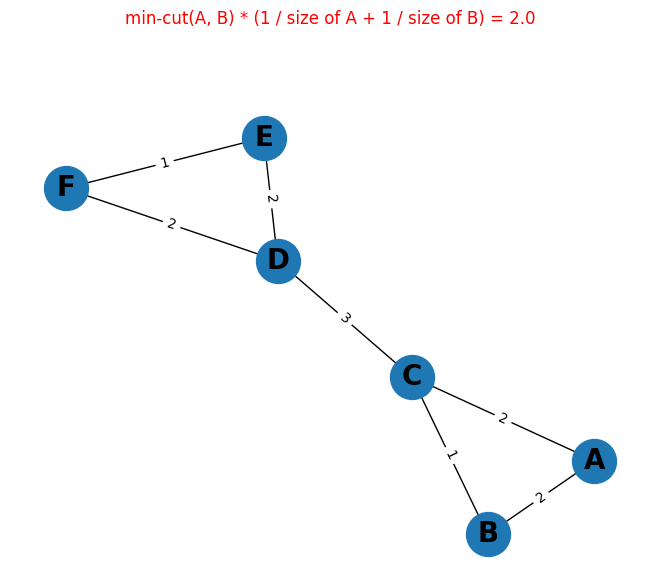

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph with weighted edges
G = nx.Graph()
G.add_weighted_edges_from([('A', 'B', 2), ('A', 'C', 2), ('B', 'C', 1), ('C', 'D', 3), ('D', 'E', 2), ('D', 'F', 2), ('E', 'F', 1)])

# Define two possible communities
community1 = {'A', 'B', 'C'}
community2 = {'D', 'E', 'F'}

def calculate_ratio_cut(G, community1, community2):
    # Find the min-cut (A, B)
    min_cut = 0
    for edge in G.edges():
        node1, node2 = edge
        if node1 in community1 and node2 in community2 or node1 in community2 and node2 in community1:
            min_cut += G.edges[edge]['weight']

    # Calculate the Ratio-Cut value
    ratio_cut = min_cut * (1 / len(community1) + 1 / len(community2))
    return ratio_cut

ratio_cut_value = calculate_ratio_cut(G, community1, community2)
print("Ratio-Cut Value:", ratio_cut_value)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=20, font_weight='bold')

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Add the Ratio-Cut formula above the graph
formula_text = f"min-cut(A, B) * (1 / size of A + 1 / size of B) = {ratio_cut_value}"
plt.text(0.5, 1.15, formula_text, fontsize=12, color='red', transform=plt.gca().transAxes, ha='center')

plt.axis('off')
plt.show()



# **Min-Max Cut Metric:**

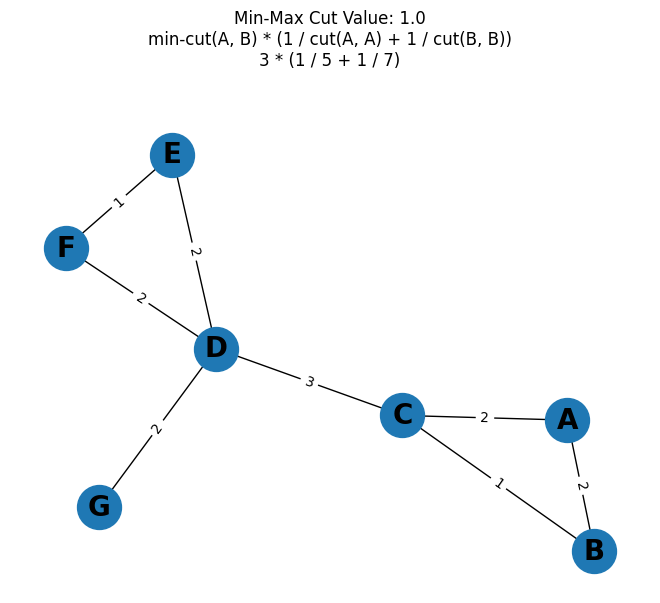

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G.add_edges_from([('A', 'B', {'weight': 2}), ('A', 'C', {'weight': 2}), ('B', 'C', {'weight': 1}),
                  ('C', 'D', {'weight': 3}), ('D', 'E', {'weight': 2}), ('D', 'F', {'weight': 2}),
                  ('E', 'F', {'weight': 1}), ('D', 'G', {'weight': 2})])
community1 = {'A', 'B', 'C'}
community2 = {'D', 'E', 'F', 'G'}
min_cut = 3
cut_A_A = 5
cut_B_B = 7
min_max_cut_value = min_cut * (1 / cut_A_A + 1 / cut_B_B)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=20, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# Add the Min-Max Cut formula above the graph
plt.text(0.5, 1.1, f"Min-Max Cut Value: {min_max_cut_value:.1f}\n"
                 f"min-cut(A, B) * (1 / cut(A, A) + 1 / cut(B, B))\n"
                 f"{min_cut} * (1 / {cut_A_A} + 1 / {cut_B_B})",
         fontsize=12, ha='center', transform=plt.gca().transAxes)
plt.axis('off')
plt.show()


# **Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


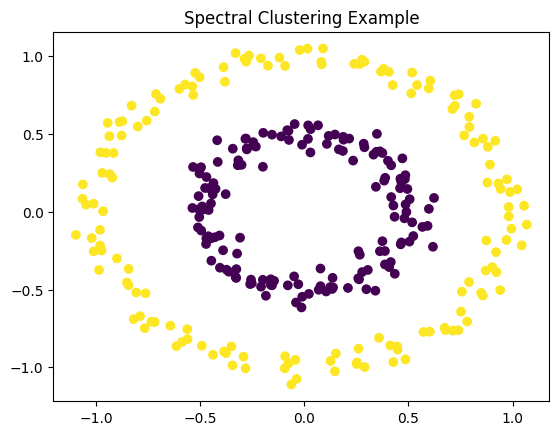

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
# Create a 2D dataset with two circular clusters
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
# Construct the graph using k-nearest neighbors
k = 10
A = kneighbors_graph(X, n_neighbors=k, mode='connectivity')
# Perform spectral clustering
n_clusters = 2
clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=k, random_state=42)
labels = clustering.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering Example')
plt.show()



# **Bottom-Up Community Mining**

Fraudulent community: {'G', 'E', 'C'}


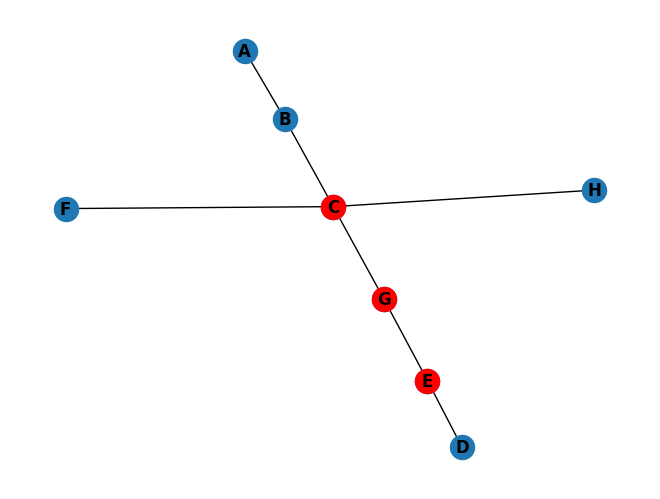

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple network
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'F'), ('C', 'G'), ('C', 'H'), ('D', 'E'), ('E', 'G')])

# Known fraudulent node
seed_node = 'C'

# Define a threshold for partial community membership (e.g., connected to at least 50% of nodes in the community)
threshold = 0.5
def bottom_up_community_mining(G, seed_node, threshold):
    community = {seed_node}
    nodes_to_check = set(G.neighbors(seed_node))
    while nodes_to_check:
        node = nodes_to_check.pop()
        common_neighbors = len(set(G.neighbors(node)).intersection(community))
        if common_neighbors / len(community) >= threshold:
            community.add(node)
            nodes_to_check.update(set(G.neighbors(node)) - community)
    return community

fraudulent_community = bottom_up_community_mining(G, seed_node, threshold)
print(f"Fraudulent community: {fraudulent_community}")

# Draw the graph with the fraudulent community highlighted in red
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_nodes(G, pos, nodelist=fraudulent_community, node_color='r')
plt.show()
